In [1]:
#Import Libraries

import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# In this folder, all the csv's are present

folder_path = 'Invoices' 

In [3]:
# Empty Dataframe

combined_df = pd.DataFrame()  


In [4]:
# Combining all the files

for filename in os.listdir(folder_path): 
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        combined_df = pd.concat([combined_df, df], axis=0)


In [5]:
# To combine the file

combined_df.to_csv('combined_data.csv', index=False)


In [6]:
# Loading the csv file

data = pd.read_csv('combined_data.csv',low_memory=False)

In [7]:
# To know about data 

data.head()

,Invoice ID,Invoice Status,Customer ID,Due Date,PurchaseOrder,SubTotal,Total,Balance,Adjustment,Expected Payment Date,...,Product ID,SKU,Customer Name,Invoice Date,Invoice Number,Account,Account Code,Sales person,Item Type,Usage Unit
0,209792000458527712,Closed,209792000285655627,2023-01-01,NaN,12394.5,12394.5,0.0,0.0,NaN,...,2.097920e+17,FARMTHFINALCAT107,KINEMATIC FOODTECH PRIVATE LIMITED,2023-01-01,INV-082845,Sales,NaN,NaN,goods,1 Kg
1,209792000458527712,Closed,209792000285655627,2023-01-01,NaN,12394.5,12394.5,0.0,0.0,NaN,...,2.097920e+17,FARMTHFINALCAT94,KINEMATIC FOODTECH PRIVATE LIMITED,2023-01-01,INV-082845,Sales,NaN,NaN,goods,1 Kg
2,209792000458527712,Closed,209792000285655627,2023-01-01,NaN,12394.5,12394.5,0.0,0.0,NaN,...,2.097920e+17,FARMTHFINALCAT82,KINEMATIC FOODTECH PRIVATE LIMITED,2023-01-01,INV-082845,Sales,NaN,NaN,goods,1 Kg
3,209792000458527712,Closed,209792000285655627,2023-01-01,NaN,12394.5,12394.5,0.0,0.0,NaN,...,2.097920e+17,FARMTHFINALCAT54,KINEMATIC FOODTECH PRIVATE LIMITED,2023-01-01,INV-082845,Sales,NaN,NaN,goods,1 Kg
4,209792000458527712,Closed,209792000285655627,2023-01-01,NaN,12394.5,12394.5,0.0,0.0,NaN,...,2.097920e+17,FARMTHFINALCAT57,KINEMATIC FOODTECH PRIVATE LIMITED,2023-01-01,INV-082845,Sales,NaN,NaN,goods,Kg


In [8]:
# Shape of the dataset

data.shape


(693360, 28)

In [9]:
# the columns to drop which are not important

columns_to_drop = ['Balance', 'Adjustment', 'Expected Payment Date','Item Desc','Discount',
                   'Discount Amount','Account Code','Sales person','PurchaseOrder','SubTotal']

data = data.drop(columns_to_drop, axis=1)


In [10]:
# After dropping the columns, Shape

data.shape

(693360, 18)

In [11]:
# Describe data

data.describe()

,Invoice ID,Customer ID,Total,Quantity,Item Total,Item Price,Product ID
count,6.933600e+05,6.933600e+05,693360.000000,693360.000000,693360.000000,693360.000000,6.933430e+05
mean,2.097920e+17,2.097920e+17,3173.905582,3.555078,146.518705,64.921056,2.097920e+17
std,1.038913e+08,1.909196e+08,3768.869519,11.567285,341.040419,49.103444,1.006360e+07
min,2.097920e+17,2.097920e+17,0.500000,0.050000,0.000000,0.000000,2.097920e+17
25%,2.097920e+17,2.097920e+17,1565.500000,0.500000,38.000000,32.000000,2.097920e+17
50%,2.097920e+17,2.097920e+17,2437.500000,1.000000,75.000000,55.000000,2.097920e+17
75%,2.097920e+17,2.097920e+17,3583.150000,3.000000,150.000000,85.000000,2.097920e+17
max,2.097920e+17,2.097920e+17,86193.500000,3000.000000,21263.000000,1500.000000,2.097920e+17


In [12]:
# Unique data in columns

print("Invoice Status :",data['Invoice Status'].unique())
print(" Item Name  : ",data['Item Name'].unique())

Invoice Status : ['Closed' 'Overdue' 'Draft' 'Open']
 Item Name  :  ['Tomato Hybrid (Mix of medium, semi ripe 12-16 pcs/kg)'
 'Potato  - (Medium, 17-20 pcs/kg)' 'Onion  - Medium'
 'Cucumber Indian (Big, misshapes)' 'curry leaves' 'Coriander Hybrid'
 'Mint Leaves (Pudhina )' 'Chilli Long Green' 'Beans Haricot'
 'Carrot Local - Medium' 'Coconut' 'Ginger (Small)' 'Garlic Whole'
 'Beetroot' 'Drumstick' 'Chow Chow' 'Bottle Gourd  (Lauki) - Big, patches'
 'Pumpkin Red (Kadoo) (Kg)' 'Amaranth Green' 'Ladies Finger - Okra/Bhindi'
 'Palak' 'Cabbage Local - Medium' 'Mushroom Button'
 'Cucumber Sambar/Mangalore' 'Methi  (Fenugreek )'
 'Ridge Gourd (Farm, Misshape)' 'Pineapple' 'Garlic Peeled'
 'Capsicum Green (Medium, misshapes, irregular size)x'
 'Cauliflower (Medium, approx 300-500gm/pc)'
 'Lemon (medium, spots, 20-30 pcs/kg)145' 'Banana Leaf' 'Tomato Hybrid'
 'Capsicum Green - Big' 'Capsicum Red - Big' 'Capsicum Yellow - Big'
 'Broccoli  - Big' 'Zucchini Green - Medium' 'Zucchini Yellow - Medi

In [13]:
# Unique data in columns

print("Usage Unit",data['Usage Unit'].unique())
print("Item Type",data['Item Type'].unique())

Usage Unit ['1 Kg' 'Kg' '1 Pc' '1 Pc (180 - 200 g/Pc)' '1 Pc (2.5-3 kg/Pc)'
 '1 Pc (3-5kg/Pc)' nan '1 Pc (1.5-2 kg/Pc)' '1 Pack' 'kg']
Item Type ['goods' 'service']


In [14]:
#Find null values

data.isnull().sum()

Invoice ID                0
Invoice Status            0
Customer ID               0
Due Date                  0
Total                     0
Last Payment Date    121289
Item Name                17
Quantity                  0
Item Total                0
Item Price                0
Product ID               17
SKU                      17
Customer Name             0
Invoice Date              0
Invoice Number            0
Account                   0
Item Type                 0
Usage Unit               17
dtype: int64

In [15]:
# Replacing null data by values 

start_date = datetime(2023, 3, 1)  
end_date = datetime(2023, 7, 31)  
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
data['Last Payment Date'].fillna(np.random.choice(date_range), inplace=True)
data['Item Name'].fillna(data['Item Name'].sample(n=1).values[0], inplace=True)
data['Usage Unit'].fillna(data['Usage Unit'].sample(n=1).values[0], inplace=True)
data.dropna(subset=['Product ID'], inplace=True)

In [16]:
#After replacing all null values

data.isnull().sum()

Invoice ID           0
Invoice Status       0
Customer ID          0
Due Date             0
Total                0
Last Payment Date    0
Item Name            0
Quantity             0
Item Total           0
Item Price           0
Product ID           0
SKU                  0
Customer Name        0
Invoice Date         0
Invoice Number       0
Account              0
Item Type            0
Usage Unit           0
dtype: int64

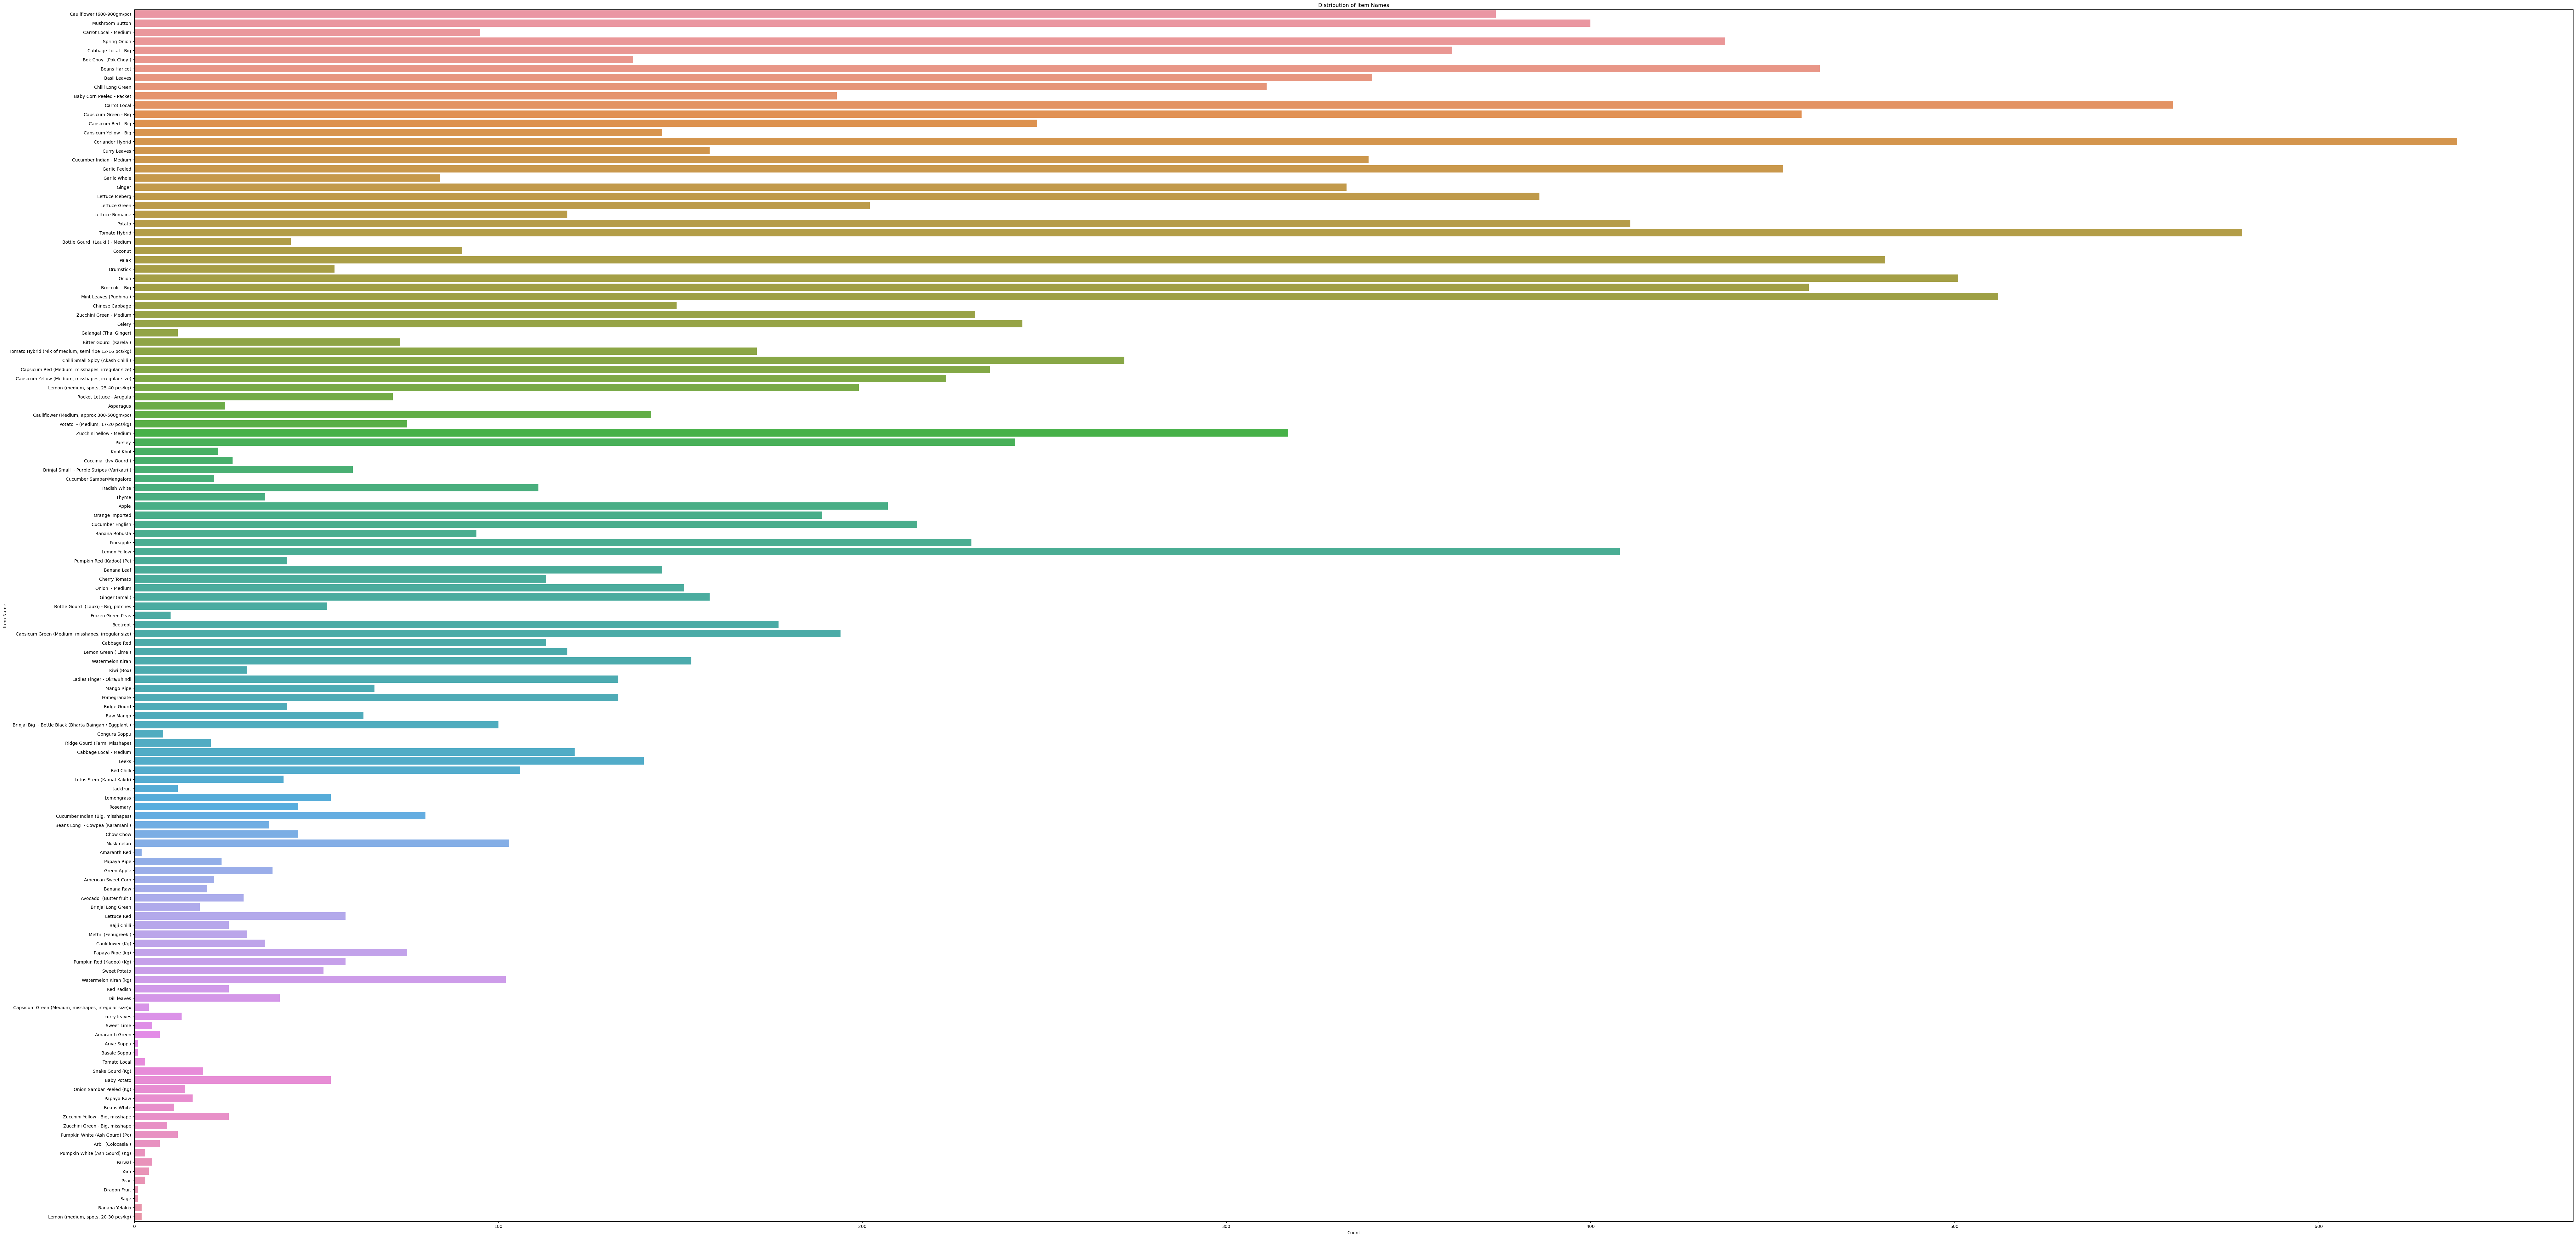

In [17]:
# Assuming your DataFrame is named 'df' and the column is 'Item Name'

plt.figure(figsize=(100, 50))
sns.countplot(data=df, y='Item Name')
plt.xlabel('Count')
plt.ylabel('Item Name')
plt.title('Distribution of Item Names')
plt.show()


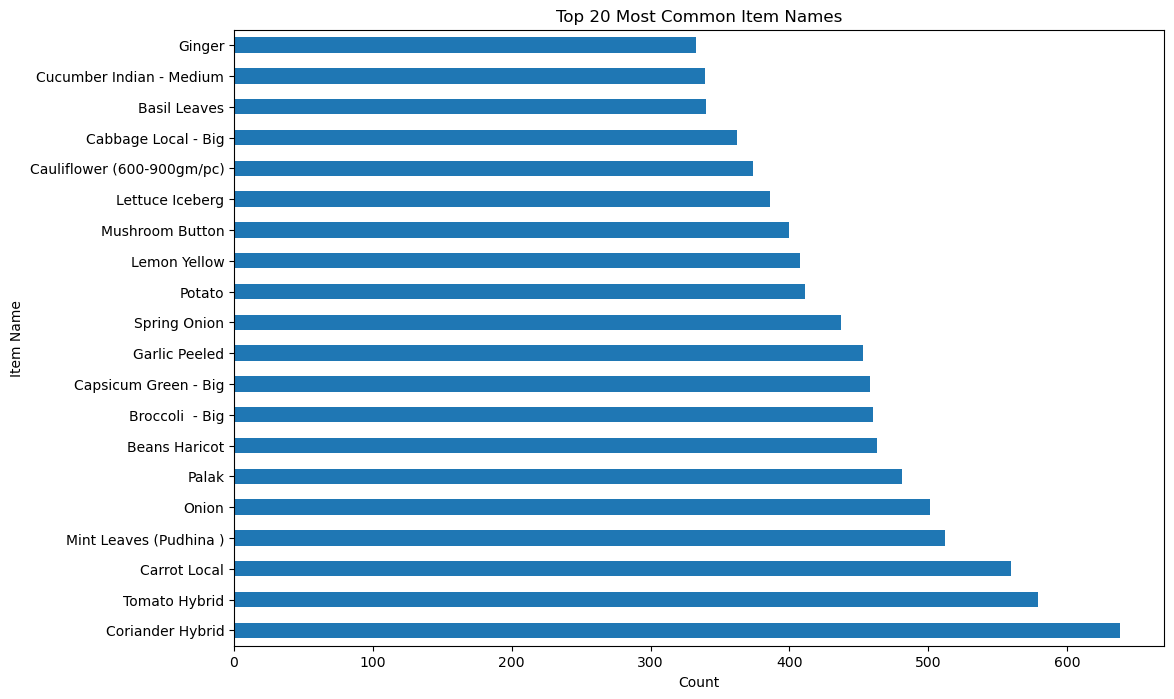

In [18]:
# This graph shows top 20 items 

plt.figure(figsize=(12, 8))
top_n = 20
df['Item Name'].value_counts().nlargest(top_n).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Item Name')
plt.title(f'Top {top_n} Most Common Item Names')
plt.show()


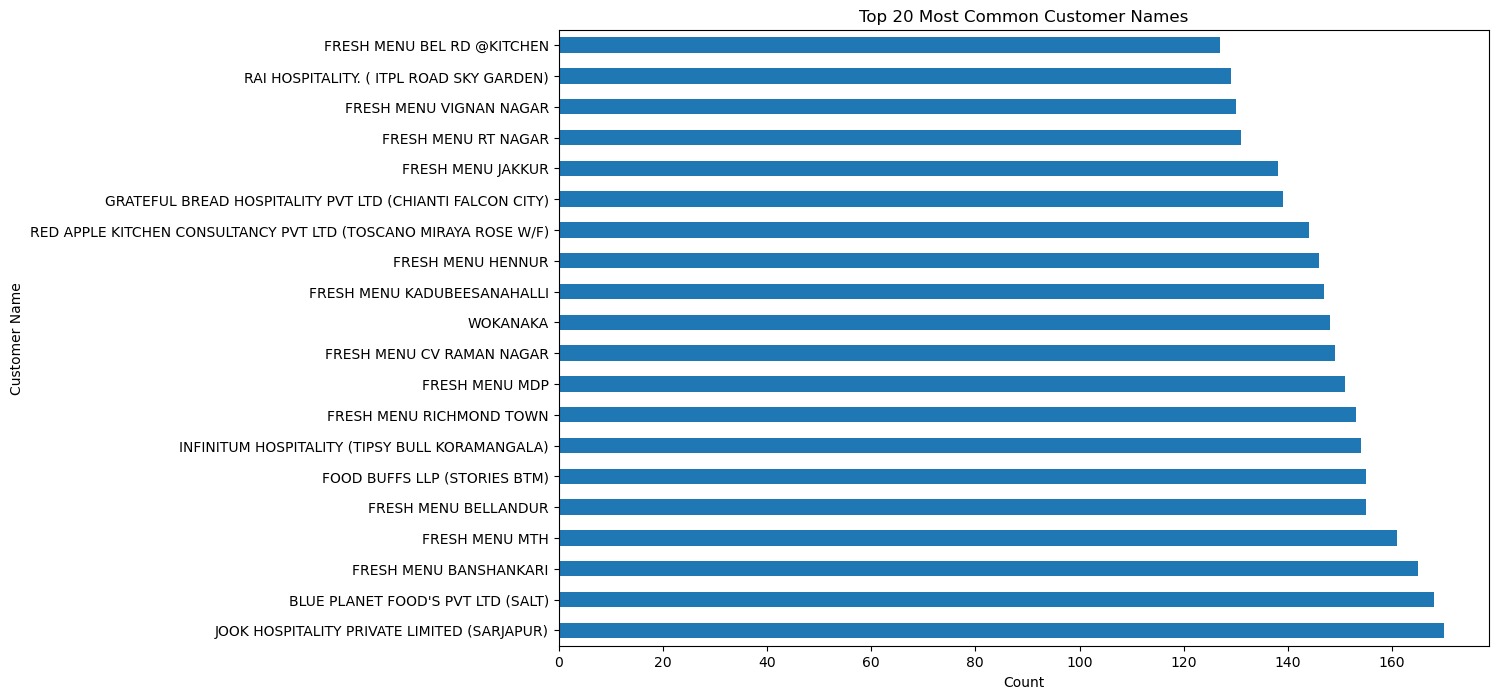

In [19]:
# This graph shows top 20 customers

plt.figure(figsize=(12, 8))
top_n = 20 # Number of most common item names to display
df['Customer Name'].value_counts().nlargest(top_n).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Customer Name')
plt.title(f'Top {top_n} Most Common Customer Names')
plt.show()

In [20]:
# Taking out month from the Date & adding as a new column

data['Month'] = pd.to_datetime(data['Invoice Date']).dt.month


In [21]:
# Finding Correlation 

data.corr()

,Invoice ID,Customer ID,Total,Quantity,Item Total,Item Price,Product ID,Month
Invoice ID,1.000000,0.121021,0.029867,-0.005948,0.010985,0.099292,-0.081377,0.974030
Customer ID,0.121021,1.000000,-0.013422,0.027716,0.027273,0.001728,0.013530,0.120774
Total,0.029867,-0.013422,1.000000,0.323371,0.422263,0.027896,0.015649,0.035627
Quantity,-0.005948,0.027716,0.323371,1.000000,0.748336,-0.148505,-0.001802,-0.004816
Item Total,0.010985,0.027273,0.422263,0.748336,1.000000,0.039536,0.008372,0.013038
Item Price,0.099292,0.001728,0.027896,-0.148505,0.039536,1.000000,0.046330,0.100411
Product ID,-0.081377,0.013530,0.015649,-0.001802,0.008372,0.046330,1.000000,-0.077425
Month,0.974030,0.120774,0.035627,-0.004816,0.013038,0.100411,-0.077425,1.000000


<AxesSubplot:>

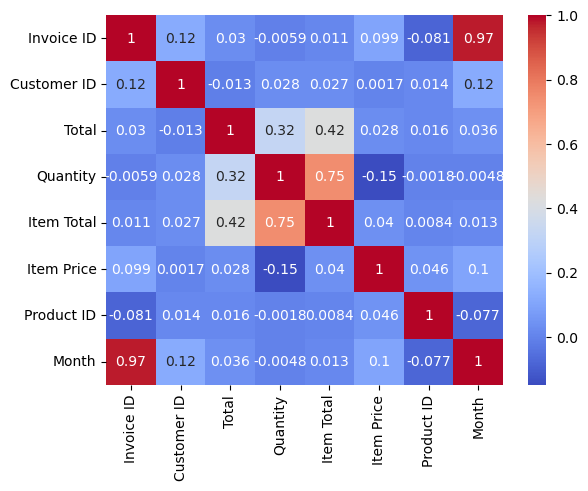

In [22]:
#Correlation plot

sns.heatmap(data.corr(),cmap='coolwarm', annot=True)

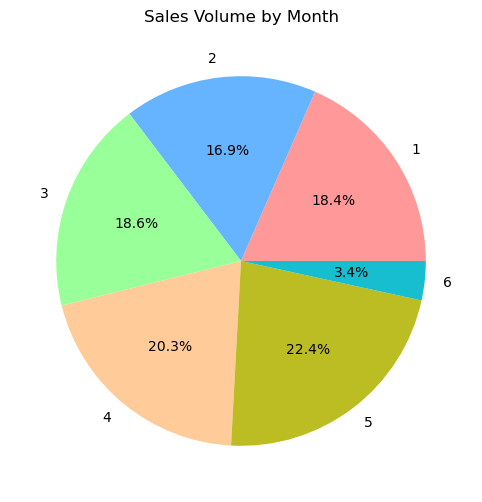

In [23]:
# Total sales for each month in the form of pie chart

monthly_sales = data.groupby('Month')['Item Total'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99','#bcbd22','#17becf'])
plt.title('Sales Volume by Month')
plt.ylabel('') 
plt.show()

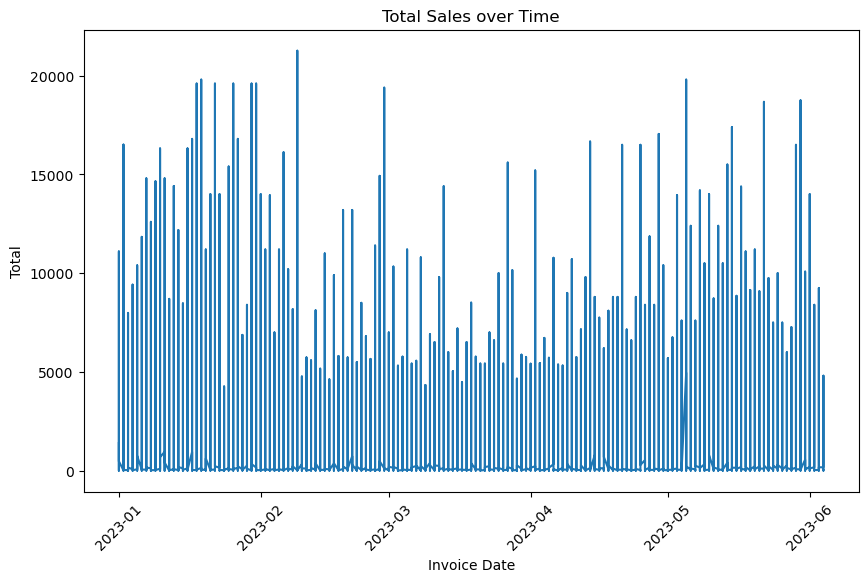

In [24]:
# Line graph between Invoice date and Item Total

data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data.sort_values('Invoice Date', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(data['Invoice Date'], data['Item Total'])
plt.xlabel('Invoice Date')
plt.ylabel('Total')
plt.title('Total Sales over Time')
plt.xticks(rotation=45)
plt.show()

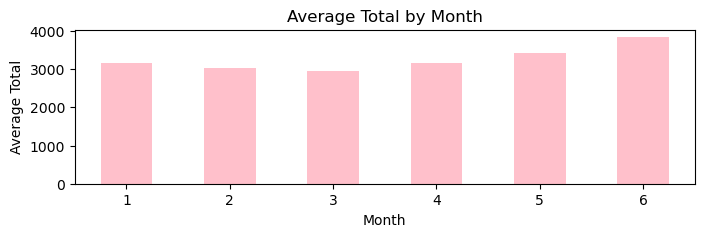

In [25]:
average_total_by_month = data.groupby('Month')['Total'].mean()
plt.figure(figsize=(8, 2))
average_total_by_month.plot(kind='bar', color='pink')
plt.xlabel('Month')
plt.ylabel('Average Total')
plt.title('Average Total by Month')
plt.xticks(rotation=0)
plt.show()


In [26]:
# Performing correlation test to check the relation between Total & Total Item

total = data['Total']
item_total = data['Item Total']
corr, pvalue = stats.pearsonr(total, item_total)
print("Correlation Test between 'Total' and 'Item Total'")
print(f"Pearson's correlation coefficient: {corr}")
print(f"P-Value: {pvalue}\n")

Correlation Test between 'Total' and 'Item Total'
Pearson's correlation coefficient: 0.42226280207676226
P-Value: 0.0



In [27]:
# Performing T test between Total & Quantity

Total=data['Total']
Quantity=data['Quantity']
t_stat, p_value = stats.ttest_ind(Total, Quantity)
print('t_stat : ',t_stat)
print('p_value :',p_value)

if p_value <= 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


t_stat :  700.4397110381743
p_value : 0.0
Reject the null hypothesis


In [28]:
# Performing chi square test between Invoice Status & Product ID

contingency_table = pd.crosstab(data['Invoice Status'], data['Product ID'])
chi2_stat, p_value = stats.chisquare(contingency_table, axis=None)
if p_value <= 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Reject the null hypothesis


In [29]:
# Saving the data in which we have done the changes
data.to_excel('data.xlsx', index=False)

We saved the data file in order to keep the changes with us